## Testing out the `bracket_builder` package I was working on last year

In [1]:
import os
import sys
import pandas as pd
import bracket_builder.draw as bb

### Standard 64 team bracket

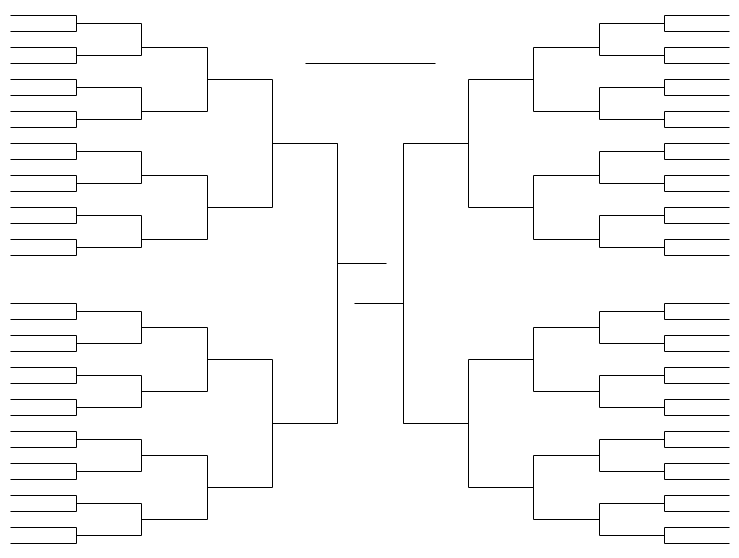

In [2]:
b = bb.Bracket(64)
b.draw_bracket()

### Adding names

In [3]:
os.chdir("../data/men/")

In [4]:
## Get past tournament data to test with
seeds = pd.read_csv("MNCAATourneySeeds.csv")
teams = pd.read_csv("MTeams.csv")
seeds = seeds.merge(teams[['TeamID', 'TeamName']])
ncaa_slots = pd.read_csv("MNCAATourneySlots.csv")

In [5]:
def remove_one_playin(ncaa_data):
    
    ### Remove the play-in seed with the seed starting with "b" for now
    #### Would ideally choose the one with the greater win prob. but doesn't matter much
    ncaa_data['seed_endswith_b'] = ncaa_data['Seed'].apply(lambda x: True if x.endswith('b') else False)
    ncaa_data = ncaa_data[~ncaa_data['seed_endswith_b']].copy()
    
    ## Change the Seed for the one starting with a
    ncaa_data['Seed'] = ncaa_data['Seed'].apply(lambda x: x[:-1] if x.endswith('a') else x)
    
    ## Drop the seed_endswith_b column
    ncaa_data = ncaa_data.drop(columns = ['seed_endswith_b'])
    
    return ncaa_data

In [6]:
### Limit to 1 season
ncaa_2019_teams = seeds[seeds['Season'] == 2019].copy()

## Remove the 'b' play-in seeds and remove 'a' suffix from the deemed 'winner'
ncaa_2019_teams = remove_one_playin(ncaa_2019_teams)

## Split the seed into Region and number parts
ncaa_2019_teams['seed_num']    = ncaa_2019_teams['Seed'].apply(lambda x: int(x[1:]))
ncaa_2019_teams['seed_region'] = ncaa_2019_teams['Seed'].apply(lambda x: x[0])
ncaa_2019_teams['seed_region_2'] = ncaa_2019_teams['seed_region'].apply(lambda x: 'Z' if x == 'Y'
                                                                             else 'Y' if x == 'Z'
                                                                             else x)

## Proper ordering for seeds within each region in the 1st round
seed_order = pd.DataFrame({'seed_num': [1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15],
                           'seed_ord': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]})
ncaa_2019_teams = ncaa_2019_teams.merge(seed_order)

## Sort it properly and check it out
ncaa_2019_teams = ncaa_2019_teams.sort_values(['seed_region_2', 'seed_ord'])
ncaa_2019_teams.head(16)

,Season,Seed,TeamID,TeamName,seed_num,seed_region,seed_region_2,seed_ord
36,2019,W01,1181,Duke,1,W,W,1
14,2019,W16,1295,N Dakota St,16,W,W,2
1,2019,W08,1433,VCU,8,W,W,3
23,2019,W09,1416,UCF,9,W,W,4
53,2019,W05,1280,Mississippi St,5,W,W,5
62,2019,W12,1251,Liberty,12,W,W,6
4,2019,W04,1439,Virginia Tech,4,W,W,7
17,2019,W13,1387,St Louis,13,W,W,8
49,2019,W06,1268,Maryland,6,W,W,9
43,2019,W11,1125,Belmont,11,W,W,10


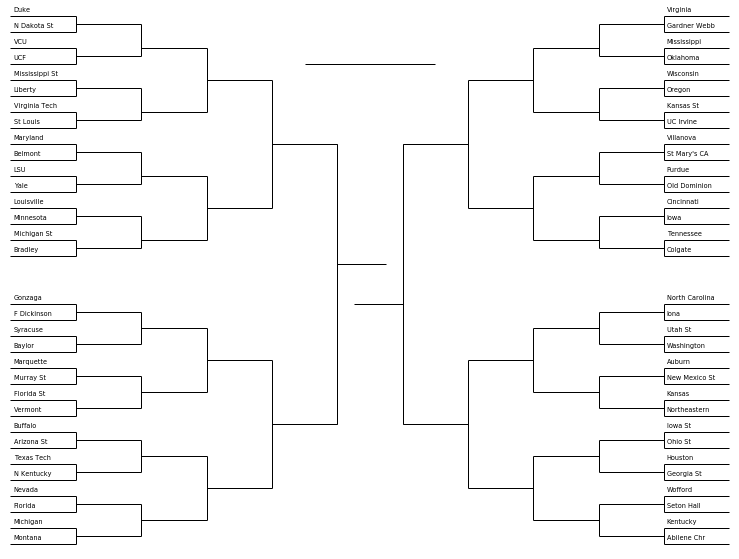

In [7]:
### Label team names (note: had to switch 'Z' and 'Y' region labels.)
b_2 = bb.Bracket(n_teams = 64, team_names = list(ncaa_2019_teams['TeamName']))
b_2.draw_bracket()
b_2.label_teams()

#### What it should look like:

![ncaa_2019](ncaa_2019_bracket.PNG)


## To-Do

  1. Fix up the `label_winners()` function and/or get a pipeline to easily get winners in required order
  2. Complete the `draw_weighted_lines()` function to draw lines in the team's colors.
  3. Get a pipeline in `calculate` going to `compute_conditional_probs()` in a way that works seamlessly with weighted lines.